<b>Source:</b>
This lab on Support Vector Machines is a Python adaptation of p. 359-366 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Original adaptation by J. Warmenhoven, updated by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016).

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC #This is the "new" important routine in this exercises

%matplotlib inline

Here a function for plotting SVM.

In [2]:
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25): #pad: margin above max and below min; h: cell size in the mesh grid; X: both x and y coordinates 
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #Make mesh grid
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel(): Return a contiguous flattened array.
    Z = Z.reshape(xx.shape) #To put predictions Z in same shape as xx (mesh)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2) #contour plot; cmap = color map; alpha = blending value
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) # s= size; c = color code    
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_ #vector with coordinates in x and y of the boundary SVM
    plt.scatter(sv[:,0], sv[:,1], c='k', cmap=mpl.cm.Paired, marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

### 9.6 Lab: Support Vector Machines

#### 9.6.1 Support Vector Classifier

The ${\tt SVC()}$ function can be used to fit a
support vector classifier when the argument ${\tt kernel="linear"}$ is used. This
function uses a slightly different formulation of the equations we saw in lecture to build the
support vector classifier. The ${\tt c}$ argument allows us to specify the cost of
a violation to the margin. When the ${\tt c}$ argument is **small**, then the margins
will be wide and many support vectors will be on the margin or will
violate the margin. When the ${\tt c}$ argument is large, then the margins will
be narrow and there will be few support vectors on the margin or violating
the margin.

We can use the ${\tt SVC()}$ function to fit the support vector classifier for a
given value of the ${\tt cost}$ parameter. Here we demonstrate the use of this
function on a two-dimensional example so that we can plot the resulting
decision boundary. Let's start by generating a set of observations, which belong
to two classes:

<b>(i)</b> Generate data

In [3]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2) #20 lines; 2 columns (variables)
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1]+1 #A trick to have 2 nice "regions" with random generators... ;-)
print(X)
print(y)
#print(len(X))
#print(len(y))

[[ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-1.19276461 -0.20487651]
 [-0.35882895  0.6034716 ]
 [-1.66478853 -0.70017904]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]
 [ 0.01939211  0.14314685]
 [ 0.12812082  0.57749207]
 [ 1.99643983  1.71242127]
 [ 1.05914424  0.63668912]
 [ 1.00328884  0.89406956]
 [ 1.79305332  0.36842837]
 [ 0.99380509  0.89893239]
 [ 0.94769185  1.24921766]
 [ 1.19766009  2.33484857]
 [ 0.91312439  2.56153229]]
[ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Let's plot the data to see whether the classes are linearly separable. 's' size, 'c' for coloring, 'cmap' for colormap. The region of feature space that will be assigned to the −1 class is shown in light blue, and the region that will be assigned to the +1 class is shown in brown. 

Text(0, 0.5, 'X2')

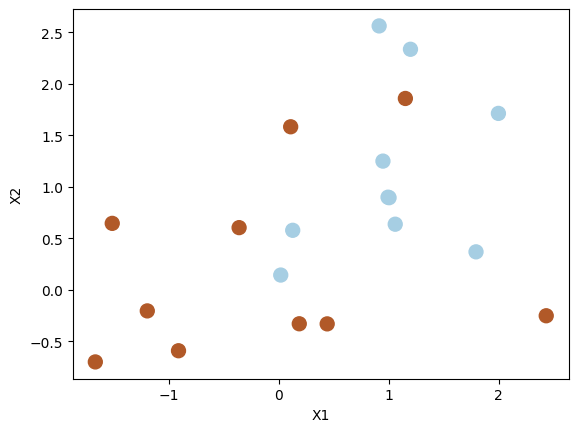

In [4]:
plt.scatter(X[:,0], X[:,1], s=100, c=y, cmap=mpl.cm.Paired) #colors according to the y vector
plt.xlabel('X1')
plt.ylabel('X2')

Clearly, a support vector classifier is not good. We need a curve boundary. For that we use 'SVC' from 'sklearn.svm'. 'C' is the regularization parameter (same as in the slides) and 'kernel' the selected kernel. For more details check https://scikit-learn.org/stable/modules/svm.html.

In [5]:
svc = SVC(C=1, kernel='linear') #kernel=linear means it is the simple sup. vector classifier (i.e. line)
svc.fit(X, y) #adjust the best classifier

SVC(C=1, kernel='linear')

<b>(ii)</b> Plot the result:

We can now plot the support vector classifier by calling the ${\tt plot\_svc()}$ function on the output of the call to ${\tt SVC()}$, as well as the data used in the call to ${\tt SVC()}$:

/tmp/ipykernel_1733/330107905.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sv[:,0], sv[:,1], c='k', cmap=mpl.cm.Paired, marker='x', s=100, linewidths=1)


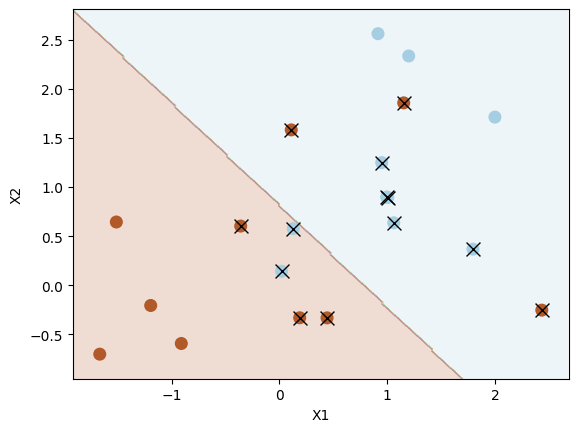

Number of support vectors:  13


In [6]:
plot_svc(svc, X, y)

<b>Important:</b>
Again, the decision boundary between the two classes is linear (because we used the argument ${\tt kernel="linear"}$).
The support vectors are plotted with crosses and the remaining observations are plotted as circles; we see here that there are 13 support vectors. We can determine their identities as follows:

In [12]:
svc.support_ #Retrieves the labels of the rows in the X array (see above)

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

What if we instead used a smaller value of the ${\tt cost}$ parameter? E.g. C=0.1

/tmp/ipykernel_1733/330107905.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sv[:,0], sv[:,1], c='k', cmap=mpl.cm.Paired, marker='x', s=100, linewidths=1)


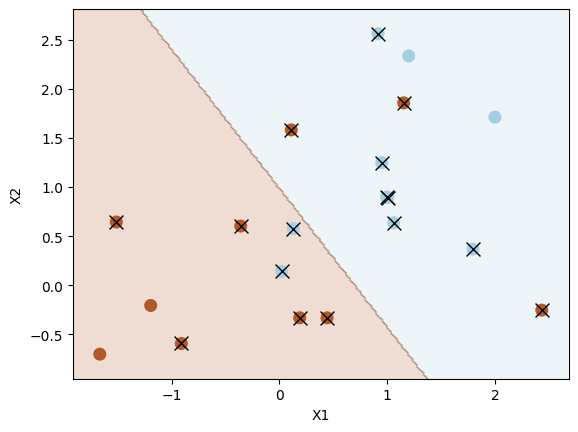

Number of support vectors:  16


array([10, 11, 13, 14, 15, 16, 17, 19,  0,  1,  2,  3,  4,  6,  8,  9],
      dtype=int32)

In [7]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)
svc2.support_

Now that a smaller value of the ${\tt c}$ parameter is being used, we obtain a
larger number of support vectors, because the margin is now **wider**.
Check documentation here: <tt>https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html</tt>

### <b>(iii)</b> Determining best cost parameter $C$:

The ${\tt sklearn.model\_selection}$ module includes a function ${\tt GridSearchCV()}$ to perform cross-validation. In order to use this function, we pass in relevant information about the set of models that are under consideration. Check https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. The following command indicates that we want perform 10-fold cross-validation to compare SVMs with a linear
kernel, using a range of values of the cost parameter:

In [8]:
#scoring = ['accuracy', 'precision']
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import make_scorer
#scoring = {'accuracy': make_scorer(accuracy_score),
#           'prec': 'precision'}

from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), #Sup. vector classifier (no curves!)
                   tuned_parameters, #vector of different cost values 'C'
                   cv=10, #define the number of folds for cross validation
                   scoring='accuracy') #What will we consider to determine the best value 
                ##scoring=confusion_matrix_scorer)
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

<b>Note</b>: The scoring can be another metric different from <tt>accuracy</tt>, e.g. <tt>precision</tt>. Check https://scikit-learn.org/stable/modules/model_evaluation.html#multimetric-scoring.

We can easily access the cross-validation errors for each of these models:

In [15]:
clf.cv_results_

{'mean_fit_time': array([0.00039306, 0.00040317, 0.00036218, 0.00031483, 0.00030098,
        0.00030854, 0.00040469]),
 'std_fit_time': array([4.15788878e-05, 5.10248067e-05, 2.37331295e-06, 4.25334001e-05,
        1.25323837e-05, 1.33720520e-05, 4.39383125e-05]),
 'mean_score_time': array([0.00027094, 0.00028975, 0.00026536, 0.00020421, 0.00022025,
        0.00020814, 0.00021174]),
 'std_score_time': array([2.53680505e-05, 4.37155987e-05, 2.04265039e-05, 1.05688297e-05,
        3.43620317e-05, 1.85550322e-05, 1.25456436e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0

The ${\tt GridSearchCV()}$ function stores the best parameters obtained, which can be accessed as
follows:

In [16]:
clf.best_params_

{'C': 0.001}

c=0.001 is best according to ${\tt GridSearchCV}$. 

### <b>(iv)</b> Prediction:

As usual, the ${\tt predict()}$ function can be used to predict the class label on a set of
test observations, at any given value of the cost parameter. Let's
generate a test data set:

In [9]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1]-1

Now we predict the class labels of these test observations. Here we use the
best model obtained through cross-validation in order to make predictions.

In [10]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,0
1,6,12


With this value of ${\tt c}$, 14 of the test observations are correctly
classified.

Notice again the convention of the confusion matrix entries: Function confusion_matrix in sklearn.metrics implies each entry in 𝑖th row and 𝑗th column giving the number of samples with true label being 𝑖th class and predicted label being 𝑗th class. Check https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Now consider a situation in which the two classes are linearly separable.
Then we can find a separating hyperplane using the ${\tt svm()}$ function. First we'll give our simulated data a little nudge so that they are linearly separable:

Text(0, 0.5, 'X2')

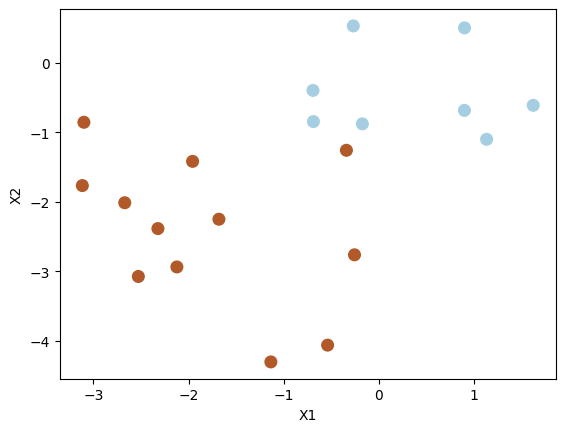

In [11]:
X_test[y_test == 1] = X_test[y_test == 1] -1 #put all brown dots 1 unit below in each variable X1 and X2
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Now the observations are **just barely linearly** separable. We fit the support
vector classifier and plot the resulting hyperplane, using a very large value
of ${\tt cost}$ so that no observations are misclassified.

/tmp/ipykernel_1733/330107905.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sv[:,0], sv[:,1], c='k', cmap=mpl.cm.Paired, marker='x', s=100, linewidths=1)


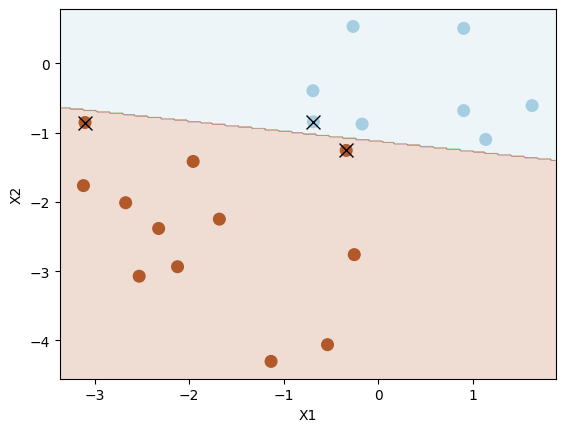

Number of support vectors:  3


In [12]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

No training errors were made and only three support vectors were used.
However, we can see from the figure that the margin is very narrow (because
the observations that are **not** support vectors, indicated as circles, are very close to the decision boundary). It seems likely that this model will perform
poorly on test data. Let's try a smaller value of ${\tt cost}$:

/tmp/ipykernel_1733/330107905.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sv[:,0], sv[:,1], c='k', cmap=mpl.cm.Paired, marker='x', s=100, linewidths=1)


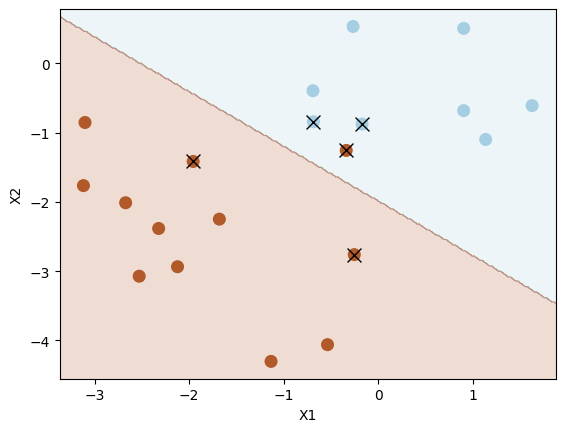

Number of support vectors:  5


In [13]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

Using ${\tt cost=1}$, we misclassify a training observation, but we also obtain
a much wider margin and make use of five support vectors. It seems
likely that this model will perform better on test data than the model with
${\tt cost=1e5}$.

#### 9.6.2 Support Vector Machine

In order to fit an SVM using a **non-linear kernel**, we once again use the ${\tt SVC()}$
function. However, now we use a different value of the parameter kernel.
To fit an SVM with a polynomial kernel we use ${\tt kernel="poly"}$, and
to fit an SVM with a radial kernel we use ${\tt kernel="rbf"}$. In the former
case we also use the ${\tt degree}$ argument to specify a degree for the polynomial
kernel, and in the latter case we use ${\tt gamma}$ to specify a
value of $\gamma$ for the radial basis kernel. Check https://scikit-learn.org/stable/modules/svm.html#kernel-functions.

Let's generate some data with a non-linear class boundary:

In [14]:
from sklearn.model_selection import train_test_split

np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)]) #merge 150 '-1' with 50 '1'
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]


Let's plot the data

Text(0, 0.5, 'X2')

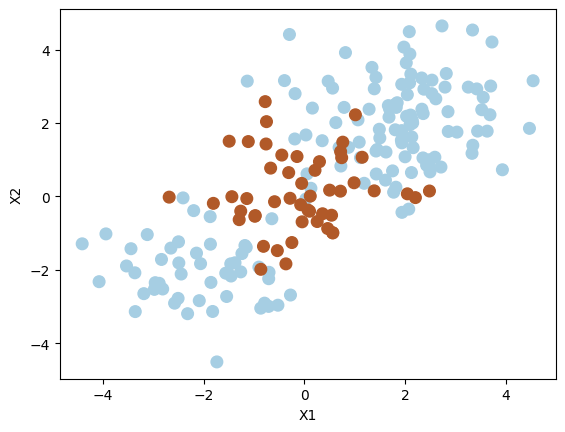

In [15]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Let's split the data in training and testing sets (50% each)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

Since one class is kind of stuck in the middle of another class, this suggests that we might want to use a **radial kernel** ('rbf') in our SVM. Now let's fit
the training data using the ${\tt SVC()}$ function with a radial kernel and $\gamma = 1$ (check https://scikit-learn.org/stable/modules/svm.html#kernel-functions)

/tmp/ipykernel_1733/330107905.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sv[:,0], sv[:,1], c='k', cmap=mpl.cm.Paired, marker='x', s=100, linewidths=1)


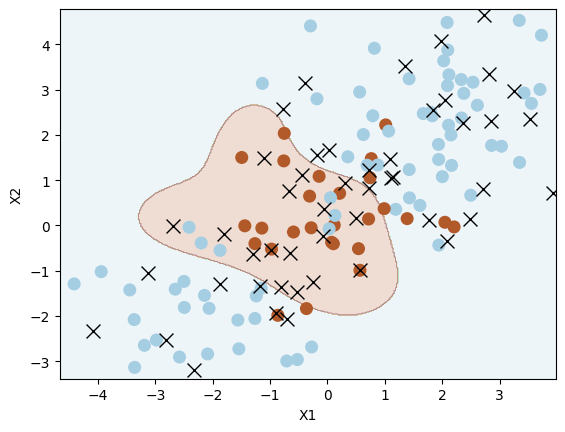

Number of support vectors:  51


In [17]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

Not too shabby! The plot shows that the resulting SVM has a decidedly non-linear
boundary. We can see from the figure that there are a fair number of training errors
in this SVM fit. 

<b>Now, important to notice is that</b> if we increase the value of cost, we can reduce the number
of training errors:

/tmp/ipykernel_1733/330107905.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sv[:,0], sv[:,1], c='k', cmap=mpl.cm.Paired, marker='x', s=100, linewidths=1)


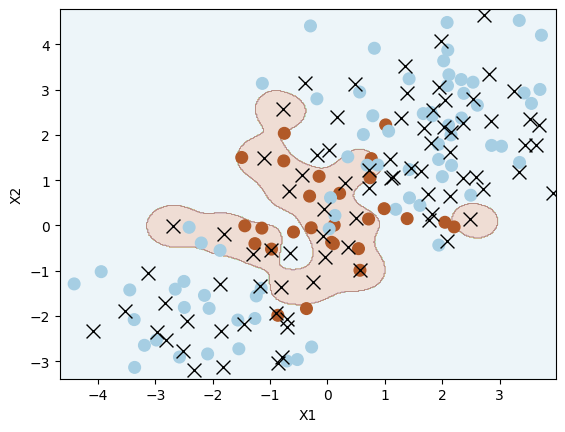

Number of support vectors:  85


In [18]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=10, kernel='rbf', gamma=5)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data. (<b>What is overfitting??</b> :-))

We can perform cross-validation using ${\tt GridSearchCV()}$ to select the best choice of
$\gamma$ and cost for an SVM with a radial kernel:

In [19]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 10, 'gamma': 0.5}

Therefore, the best choice of parameters involves ${\tt cost=1}$ and ${\tt gamma=0.5}$. We
can plot the resulting fit using the ${\tt plot\_svc()}$ function, and view the test set predictions for this model by applying the ${\tt predict()}$
function to the test data:

/tmp/ipykernel_1733/330107905.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sv[:,0], sv[:,1], c='k', cmap=mpl.cm.Paired, marker='x', s=100, linewidths=1)


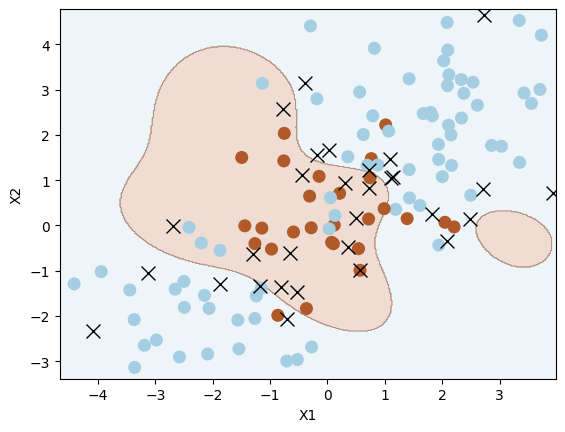

Number of support vectors:  32
[[66  7]
 [ 6 21]]
0.87


In [20]:
plot_svc(clf.best_estimator_, X_test, y_test)
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))
print(clf.best_estimator_.score(X_test, y_test))

85% of test observations are correctly classified by this SVM. Not bad!

#### 9.6.3 Receiver operating characteristic (ROC) curves

The ROC curve is a graphical plot showing the performance of a binary classifier. In particular, it shows the true positive rate (TPR) - which equals recall - against the false positive rate (FPR) - which equals (1-specificity) - at various threshold settings. The overall performance is given by the area under the ROC curve (AUC). The ${\tt auc()}$ function from the ${\tt sklearn.metrics}$ package can be used to produce ROC curves such as those we saw in lecture:

In [21]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

Let's start by fitting two models, one more flexible than the other:

In [22]:
# More constrained model
svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [23]:
# More flexible model (larger gamma)
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=50)

SVMs and support vector classifiers output class labels for each observation.
However, it is also possible to obtain fitted values for each observation,
which are the numerical scores used to obtain the class labels. For instance,
in the case of a support vector classifier, the fitted value for an observation
$X = (X_1,X_2, . . .,X_p)^T$ takes the form $\hat\beta_0 + \hat\beta_1X_1 + \hat\beta_2X_2 + . . . + \hat\beta_pX_p$.

For an SVM with a non-linear kernel, the equation that yields the fitted
value is given in (9.23) on p. 352 of the ISLR book. In essence, the sign of the fitted value determines
on which side of the decision boundary the observation lies. Therefore, the
relationship between the fitted value and the class prediction for a given
observation is simple: if the fitted value exceeds zero then the observation
is assigned to one class, and if it is less than zero than it is assigned to the
other.

<b>In order to obtain the fitted values for a given SVM model fit</b>, we
use the ${\tt .decision\_function()}$ method of the SVC:

<tt>y_train_score3 = svm3.decision_function(X_train)</tt>

<tt>y_train_score4 = svm4.decision_function(X_train)</tt>

Now we can produce the ROC plot to see how the models perform on both the training and the test data:

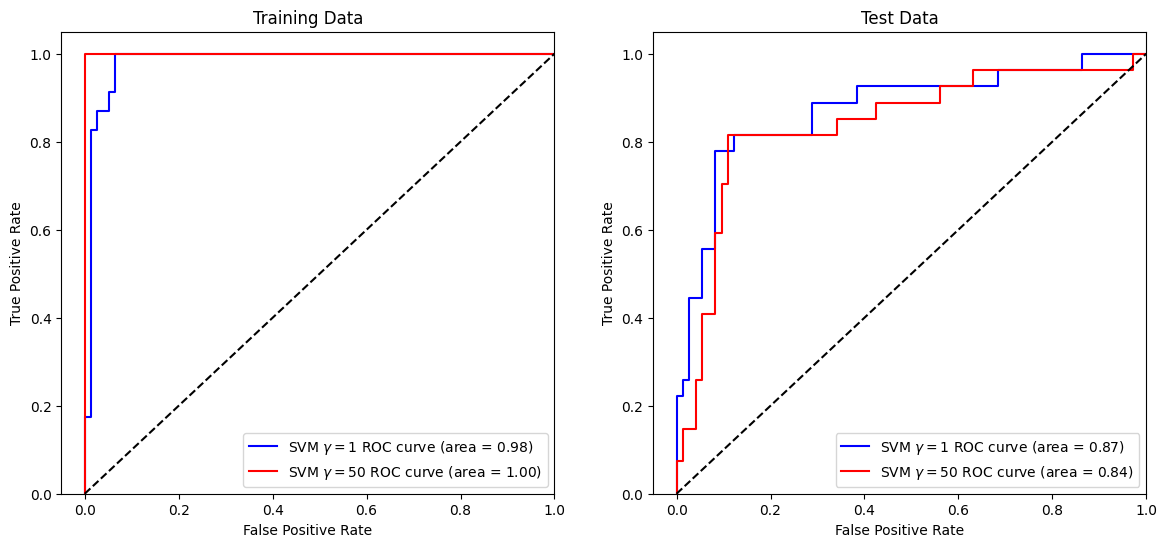

In [24]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score5 = svm3.decision_function(X_test)
y_test_score6 = svm4.decision_function(X_test)

false_pos_rate5, true_pos_rate5, _ = roc_curve(y_test, y_test_score5)
roc_auc5 = auc(false_pos_rate5, true_pos_rate5)

false_pos_rate6, true_pos_rate6, _ = roc_curve(y_test, y_test_score6)
roc_auc6 = auc(false_pos_rate6, true_pos_rate6)

ax2.plot(false_pos_rate5, true_pos_rate5, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc5, color='b')
ax2.plot(false_pos_rate6, true_pos_rate6, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc6, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

#### 9.6.4 SVM with Multiple Classes

If the response is a factor containing more than two levels, then the ${\tt svm()}$
function will perform multi-class classification using the one-versus-one approach.
We explore that setting here by generating a third class of observations:

[[ 2.09120472e+00  3.09128273e+00]
 [ 5.30296910e-02  6.13650468e-01]
 [-2.96491574e-01  4.40983430e+00]
 [ 3.72783617e+00  4.20455628e+00]
 [ 2.79482764e+00  2.97642110e+00]
 [ 8.16572853e-01  3.91636361e+00]
 [ 8.76673199e-01  1.33596453e+00]
 [ 1.62164143e+00  1.20838473e+00]
 [ 2.85954811e+00  1.76921100e+00]
 [ 1.93433897e+00  1.79136377e+00]
 [ 3.34686857e+00  1.39304720e+00]
 [ 1.82575179e+00  2.42405142e+00]
 [ 3.54009895e-01  1.51645905e+00]
 [ 2.53546825e+00  3.16614049e+00]
 [ 2.16168311e+00  1.32716607e+00]
 [ 3.44252413e+00  1.77851939e+00]
 [ 2.03126431e+00  2.18192959e+00]
 [ 1.93707127e+00  1.45843154e+00]
 [ 2.47451842e+00  8.35408828e-01]
 [ 1.49909061e+00  1.59143904e+00]
 [ 1.06565164e+00  2.08451015e+00]
 [ 2.14369102e+00  2.07554944e+00]
 [ 1.84435490e+00  2.55085006e+00]
 [ 3.70202996e+00  3.00609370e+00]
 [-1.13491977e+00  3.13953350e+00]
 [ 1.30200641e-01  2.20886964e-01]
 [ 2.12776290e+00  6.48982240e-01]
 [ 3.55396720e+00  2.69696575e+00]
 [ 1.18853885e+00  3

Text(0, 0.5, 'XX2')

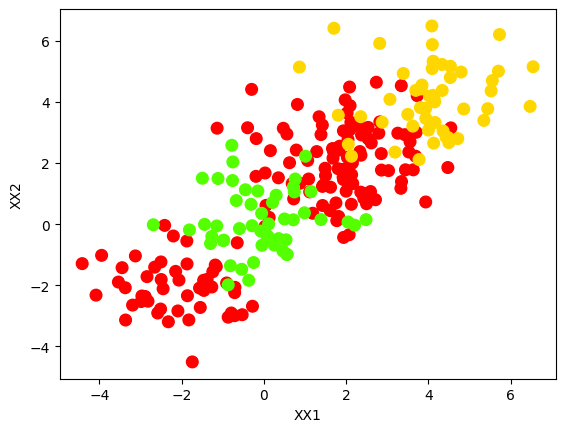

In [25]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
print(XX)
print(yy)
XX[yy ==0] = XX[yy == 0] +4
plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2')

Fitting an SVM to multiclass data uses identical syntax to fitting a simple two-class model:

/tmp/ipykernel_1733/330107905.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sv[:,0], sv[:,1], c='k', cmap=mpl.cm.Paired, marker='x', s=100, linewidths=1)


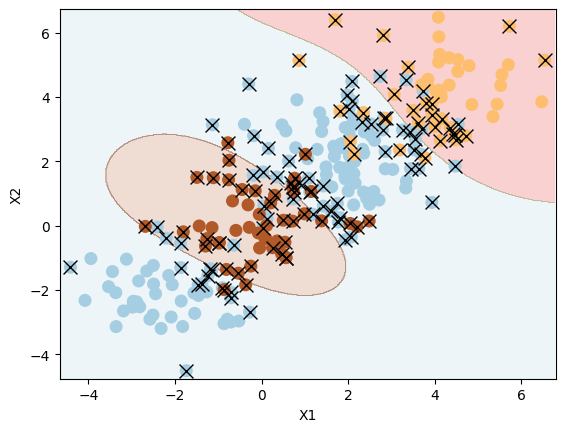

Number of support vectors:  128


In [26]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)
plot_svc(svm5, XX, yy)